###Import Statements

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

###Defining model

In [0]:
vgg = VGG16()

W0701 05:26:17.947512 139677908637568 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


553467904/553467096 [==============================] - 17s 0us/step


In [0]:
model = Sequential()

for i in vgg.layers:
  model.add(i)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [0]:
model.pop()

for i in model.layers:
  i.trainable = False
  
model.layers[-1].trainable = True

In [0]:
model.add(Dense(125, activation = 'softmax' ))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

###Training model


In [0]:
train_datagen = ImageDataGenerator(
preprocessing_function = preprocess_input,
validation_split = 0.2
)

In [0]:
test_datagen = ImageDataGenerator(
preprocessing_function = preprocess_input
)

In [0]:
train_batch_size = 128
test_batch_size = 64

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
directory = '/content/gdrive/My Drive/Training_Test/sketches_train'

train_generator = train_datagen.flow_from_directory(
 directory,
 target_size=(224, 224),
 color_mode='rgb',
 class_mode='categorical',
 batch_size = train_batch_size,
 subset = 'training')


valid_generator = train_datagen.flow_from_directory(
 directory,
 target_size=(224,224),
 color_mode = 'rgb',
 class_mode = 'categorical',
 batch_size = train_batch_size,
 subset = 'validation'
)

Found 46507 images belonging to 125 classes.
Found 11573 images belonging to 125 classes.


In [0]:
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = '/content/gdrive/My Drive/models/Sketchy Database models/sketches verification/sketches_verification.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')

callbacks_list = [checkpoint]

In [0]:
model.fit_generator(
  
    train_generator,
  
    steps_per_epoch = train_generator.samples // train_batch_size,
  
    validation_data = valid_generator,
    
    validation_steps = valid_generator.samples // train_batch_size,
    
    callbacks = callbacks_list,
    
    workers = 7,
    
    epochs = 20
  

)

Epoch 1/20
362/363 [============================>.] - ETA: 8s - loss: 3.6488 - acc: 0.4793 
Epoch 00001: val_acc improved from -inf to 0.57882, saving model to /content/gdrive/My Drive/models/Sketchy Database models/sketches verification/sketches_verification.h5
363/363 [==============================] - 3637s 10s/step - loss: 3.6432 - acc: 0.4797 - val_loss: 1.6395 - val_acc: 0.5788
Epoch 2/20
362/363 [============================>.] - ETA: 1s - loss: 1.2200 - acc: 0.6716
Epoch 00002: val_acc improved from 0.57882 to 0.60729, saving model to /content/gdrive/My Drive/models/Sketchy Database models/sketches verification/sketches_verification.h5
363/363 [==============================] - 543s 1s/step - loss: 1.2198 - acc: 0.6716 - val_loss: 1.5347 - val_acc: 0.6073
Epoch 3/20
362/363 [============================>.] - ETA: 1s - loss: 0.9643 - acc: 0.7294
Epoch 00003: val_acc improved from 0.60729 to 0.62300, saving model to /content/gdrive/My Drive/models/Sketchy Database models/sketches

###Finetuning the model

In [0]:
model.load_weights('/content/gdrive/My Drive/models/Sketchy Database models/sketches verification/sketches_verification.h5')

In [0]:
model.compile(loss="categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.00001),	metrics=["accuracy"])

In [0]:
train_generator.reset()
valid_generator.reset()

In [0]:
for i in model.layers:
  i.trainable = True

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = '/content/gdrive/My Drive/models/Sketchy Database models/sketches verification/sketches_verification_finetuned.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')

callbacks_list = [checkpoint]

In [0]:
model.fit_generator(

    train_generator,

    steps_per_epoch = train_generator.samples // 128,

    epochs = 20,
    
    validation_data = valid_generator,

    validation_steps = valid_generator.samples // 128,
    
    callbacks = callbacks_list,
    
    workers = 7,
)

Epoch 1/20


W0630 12:07:46.548059 139755452249984 training.py:2197] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?


362/363 [============================>.] - ETA: 1s - loss: 0.1186 - acc: 0.9631
Epoch 00001: val_acc improved from -inf to 0.69523, saving model to /content/gdrive/My Drive/models/Sketchy Database models/sketches verification/sketches_verification_finetuned.h5
363/363 [==============================] - 478s 1s/step - loss: 0.1184 - acc: 0.9632 - val_loss: 1.8226 - val_acc: 0.6952
Epoch 2/20
362/363 [============================>.] - ETA: 1s - loss: 0.0693 - acc: 0.9800
Epoch 00002: val_acc improved from 0.69523 to 0.70095, saving model to /content/gdrive/My Drive/models/Sketchy Database models/sketches verification/sketches_verification_finetuned.h5
363/363 [==============================] - 481s 1s/step - loss: 0.0693 - acc: 0.9801 - val_loss: 1.8172 - val_acc: 0.7010
Epoch 3/20
362/363 [============================>.] - ETA: 1s - loss: 0.0560 - acc: 0.9846
Epoch 00003: val_acc improved from 0.70095 to 0.70312, saving model to /content/gdrive/My Drive/models/Sketchy Database models/sk

### Testing the model

In [0]:
model.load_weights('/content/gdrive/My Drive/models/Sketchy Database models/sketches verification/sketches_verification_finetuned.h5')

In [0]:
test_gen = ImageDataGenerator(
preprocessing_function = preprocess_input
)


directory = '/content/gdrive/My Drive/Training_Test/sketches_test'

test_datagenerator = test_gen.flow_from_directory(
  directory,
  target_size = (224,224),
  color_mode = 'rgb',
  class_mode = 'categorical',
  batch_size = 64,
)

Found 7342 images belonging to 125 classes.


In [0]:
loss, acc = model.evaluate_generator(test_datagenerator, workers = 4, verbose = 1)

115/115 [==============================] - 861s 7s/step - loss: 2.0701 - acc: 0.6918


In [0]:
acc

0.69177336

In [0]:
model.summary()

W0619 06:05:40.580009 139689223653248 training.py:2197] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

###Feature Extraction for Training Sketches

In [0]:
model.pop()

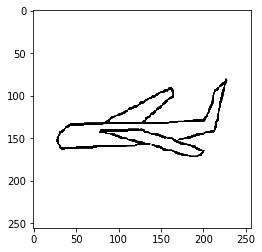

In [0]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import cv2
import numpy as np


layer_output = model.output 
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=layer_output)


data = plt.imread('/content/gdrive/My Drive/Training_Test/sketches_train/airplane/n02691156_58-1.png')
data = cv2.resize(data,(224,224))
data = np.expand_dims(data, axis=0)
data = preprocess_input(data)

In [0]:
activations = intermediate_layer_model.predict(data)
final_layer = activations

In [0]:
np.squeeze(activations).shape

(4096,)

In [0]:
import os
path = '/content/gdrive/My Drive/Training_Test/sketches_train/'
dest = '/content/gdrive/My Drive/feature_vectors_final/sketches_train/'

count = 0

for i in sorted(os.listdir(path))[:20]:
  os.mkdir(os.path.join(dest,i))  
  for j in sorted(os.listdir(path+i)):
    data = plt.imread(os.path.join(path,i,j))
    data = cv2.resize(data, (224,224))
    data = np.expand_dims(data, axis=0)
    data = preprocess_input(data)
    activations = intermediate_layer_model.predict(data)
    final_fea = np.squeeze(activations[-1])
    np.save(os.path.join(dest, i, j.strip('.png') + '.npy'), final_fea)  
  print(i)

airplane
alarm_clock
ant
ape
apple
armor
axe
banana
bat
bear
bee
beetle
bell
bench
bicycle
blimp
bread
butterfly
cabin
camel


###Feature Extraction for Testing Sketches

In [0]:
model.pop()
from tensorflow.keras.models import Model




layer_outputs = [layer.output for layer in model.layers] 
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=layer_outputs)

In [0]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
l = []
path = '/content/gdrive/My Drive/Training_Test/sketches_test/'


for i in sorted(os.listdir(path)):
  
  for j in sorted(os.listdir(path+i)):
    data = plt.imread(path+i+'/'+j)
    data = cv2.resize(data, (224,224))
    data = preprocess_input(data)
    data = np.expand_dims(data, axis=0)
    activations = intermediate_layer_model.predict(data)
    l.append(activations[-1])
  print(i)

airplane
alarm_clock
ant
ape
apple
armor
axe
banana
bat
bear
bee
beetle
bell
bench
bicycle
blimp
bread
butterfly
cabin
camel
candle
cannon
car_(sedan)
castle
cat
chair
chicken
church
couch
cow
crab
crocodilian
cup
deer
dog
dolphin
door
duck
elephant
eyeglasses
fan
fish
flower
frog
geyser
giraffe
guitar
hamburger
hammer
harp
hat
hedgehog
helicopter
hermit_crab
horse
hot-air_balloon
hotdog
hourglass
jack-o-lantern
jellyfish
kangaroo
knife
lion
lizard
lobster
motorcycle
mouse
mushroom
owl
parrot
pear
penguin
piano
pickup_truck
pig
pineapple
pistol
pizza
pretzel
rabbit
raccoon
racket
ray
rhinoceros
rifle
rocket
sailboat
saw
saxophone
scissors
scorpion
sea_turtle
seagull
seal
shark
sheep
shoe
skyscraper
snail
snake
songbird
spider
spoon
squirrel
starfish
strawberry
swan
sword
table
tank
teapot
teddy_bear
tiger
tree
trumpet
turtle
umbrella
violin
volcano
wading_bird
wheelchair
windmill
window
wine_bottle
zebra


In [0]:
import numpy as np

In [0]:
final = np.squeeze(np.asarray(l))

In [0]:
np.save('/content/gdrive/My Drive/feature_vectors_final/sketches_test_collated/final.npy',final)

In [0]:
final = np.load('/content/gdrive/My Drive/feature_vectors_final/sketches_test_collated/final.npy')

path = '/content/gdrive/My Drive/Training_Test/sketches_test/'

labels = []
count = 0

for i in sorted(os.listdir(path)):
  
  for j in sorted(os.listdir(path+i)):
    labels.append(count)
  count+=1
    
  

In [0]:
labels = np.asarray(labels)

In [0]:
final.shape

(7342, 4096)

In [0]:
np.save('/content/gdrive/My Drive/feature_vectors_final/sketches_test_collated/labels.npy',labels)

In [0]:
!pip install openTSNE

     |████████████████████████████████| 839kB 6.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/82/66/5c/ff15e5b7c0fd8cf975379e972826fd51201ba12701688656c3
  Stored in directory: /root/.cache/pip/wheels/c2/dc/94/2055c891994f758c6453808c69b6ce852672e5e9c426c56717
Successfully built openTSNE pynndescent


In [0]:
from openTSNE import TSNE
tsne = TSNE(random_state=0).fit(final)

In [0]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(20, 20))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.set_facecolor('w')
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=10)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x7f089e9a4978>)

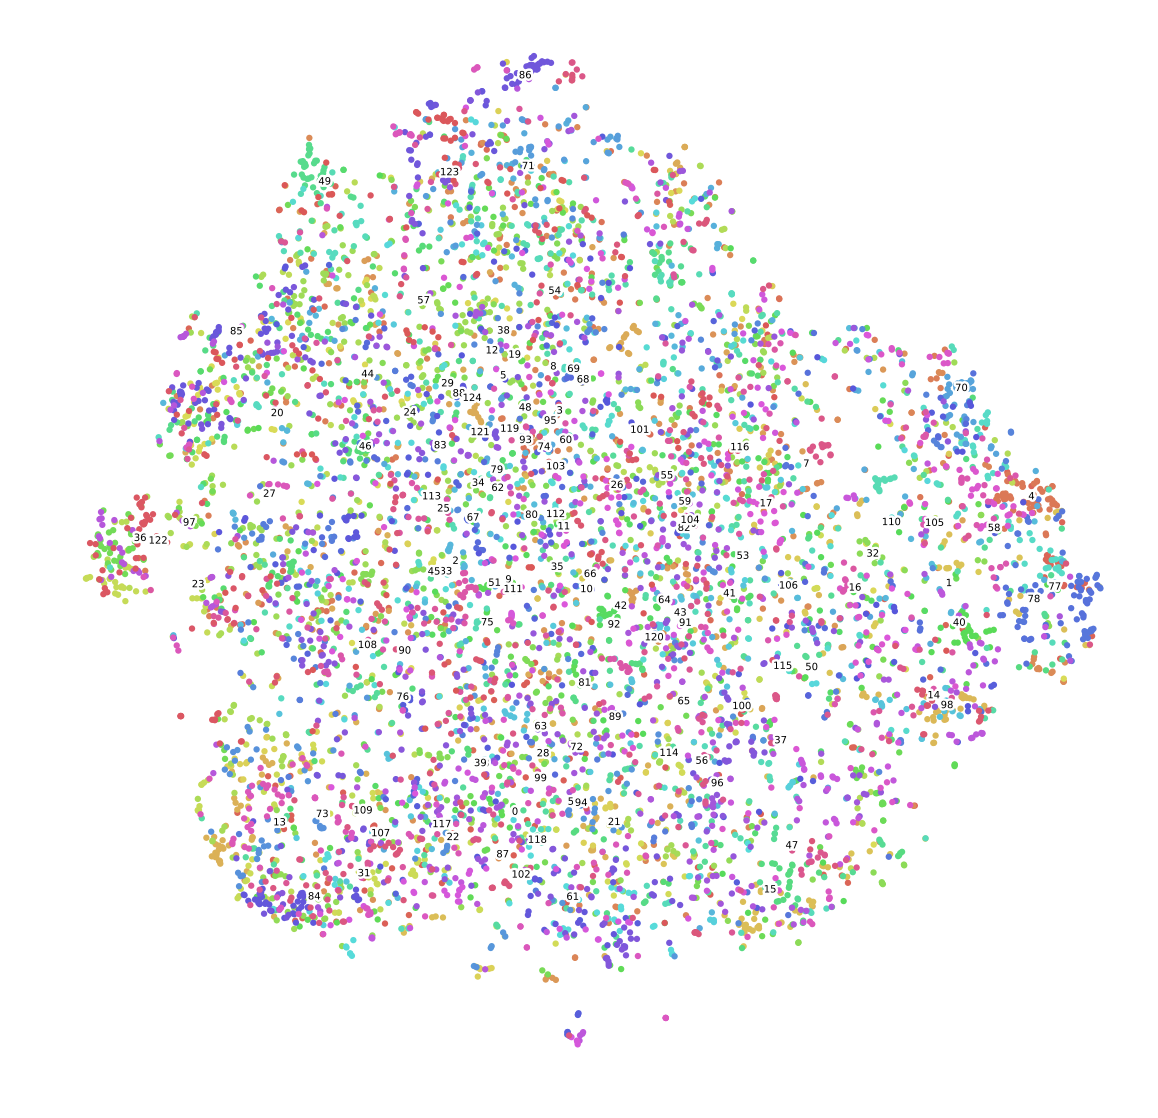

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as PathEffects
fashion_scatter(tsne, labels)

###Feature Extraction for Ambiguous Sketches

In [0]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
l = []
path = '/content/gdrive/My Drive/Training_Test/sketches_ambiguous/'


for i in sorted(os.listdir(path)):
  
  for j in sorted(os.listdir(path+i)):
    data = plt.imread(path+i+'/'+j)
    data = cv2.resize(data, (224,224))
    data = preprocess_input(data)
    data = np.expand_dims(data, axis=0)
    activations = intermediate_layer_model.predict(data)
    l.append(activations[-1])
  print(i)

airplane
alarm_clock
ant
ape
apple
armor
axe
banana
bat
bear
bee
beetle
bell
bench
bicycle
blimp
bread
butterfly
cabin
camel
candle
cannon
car_(sedan)
castle
cat
chair
chicken
church
couch
cow
crab
crocodilian
cup
deer
dog
dolphin
door
duck
elephant
eyeglasses
fan
fish
flower
frog
geyser
giraffe
guitar
hamburger
hammer
harp
hat
hedgehog
helicopter
hermit_crab
horse
hot-air_balloon
hotdog
hourglass
jack-o-lantern
jellyfish
kangaroo
knife
lion
lizard
lobster
motorcycle
mouse
mushroom
owl
parrot
pear
penguin
piano
pickup_truck
pig
pineapple
pistol
pizza
pretzel
rabbit
raccoon
racket
ray
rhinoceros
rifle
rocket
sailboat
saw
saxophone
scissors
scorpion
sea_turtle
seagull
seal
shark
sheep
shoe
skyscraper
snail
snake
songbird
spider
spoon
squirrel
starfish
strawberry
swan
sword
table
tank
teapot
teddy_bear
tiger
tree
trumpet
turtle
umbrella
violin
volcano
wading_bird
wheelchair
windmill
window
wine_bottle
zebra


In [0]:
import numpy as np

In [0]:
final = np.squeeze(np.asarray(l))

In [0]:
np.save('/content/gdrive/My Drive/feature_vectors_final/sketches_ambiguous_collated/final.npy',final)

In [0]:
final = np.load('/content/gdrive/My Drive/feature_vectors_final/sketches_test_collated/final.npy')

path = '/content/gdrive/My Drive/Training_Test/sketches_test/'

labels = []
count = 0

for i in sorted(os.listdir(path)):
  
  for j in sorted(os.listdir(path+i)):
    labels.append(count)
  count+=1
    
  

In [0]:
labels = np.asarray(labels)

In [0]:
np.save('/content/gdrive/My Drive/feature_vectors_final/sketches_ambiguous_collated/labels.npy',labels)